Importing the libraries 

In [244]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial.distance import correlation

Importing the CSV 

In [245]:
excel_file_path = r'C:\Users\khaled\Desktop\Education\GUC Documents\Semester 10\Machine Learning\Assignment 1\Customer data.csv'
df = pd.read_csv(excel_file_path) 
df = df.drop(df.columns[0], axis=1)
print(df.shape)

(2000, 7)


Testing the Eclidean distance Function 

In [246]:
data_points = df.to_numpy()
print(data_points)
Ecluidian_distance = np.linalg.norm(data_points[1] - data_points[2])
print(Ecluidian_distance)

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]
61563.005977616136


The Distance Function 

In [282]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):

    num_rows = len(Data_points)
    num_Columns = len(Cluster_Centroids)
    Distance_Matrix = np.zeros((num_rows, num_Columns))
    
    for i in range(num_rows):
        for j in range(num_Columns): 
            if Distance_Type == "Ecluidian distance":
                ecluidian_distance = np.linalg.norm(Data_points[i] - Cluster_Centroids[j])
                Distance_Matrix[i, j] = ecluidian_distance 
            elif Distance_Type == "Pearson correlation distance":
                pearson_distance = 1 - correlation(Data_points[i], Cluster_Centroids[j])
                Distance_Matrix[i, j] = pearson_distance 

    return Distance_Matrix

Testing the GUC_Distance Function 

In [286]:
np.random.seed(42)
data_points = df.to_numpy()
Cluster_Centroids = np.random.random((5, 7))
Cluster_Distance  = GUC_Distance(Cluster_Centroids, data_points, "Ecluidian distance")
print(Cluster_Distance)
Cluster_index = np.argmin(Cluster_Distance, axis=1)
min_distance_value = Cluster_Distance[np.arange(Cluster_Distance.shape[0]), Cluster_index]

[[124669.86162372 124669.04774839 124669.58591418 124669.23265273
  124669.95264606]
 [150772.8454981  150772.03160802 150772.5696292  150772.21639064
  150772.93647545]
 [ 89209.85704625  89209.04317693  89209.58134968  89209.22808464
   89209.9480899 ]
 ...
 [ 86399.84929145  86399.0354111   86399.57351236  86399.22025833
   86399.94030672]
 [ 97967.84674748  97967.03286857  97967.57093099  97967.21768413
   97967.93775955]
 [ 68415.8482959   68415.0344163   68415.57251801  68415.21926335
   68415.93931294]]


In [ ]:
np.random.seed(42)
Cluster_Centroids = np.zeros((5, data_points.shape[1]))
Final_Cluster_Distance = np.zeros((len(data_points), 4))
Cluster_Metric = np.zeros(Cluster_Centroids.shape[0])
column_ranges = np.ptp(data_points, axis=0)
rows = Cluster_Centroids.shape[0]

for i in range(rows):
    Cluster_Centroids[i, :] = np.random.randint(low=0, high=column_ranges, size=data_points.shape[1])

# The Clustering Loop
j = 1
sum_of_mean_distances_old = 0

while(True):

    if j > 1:
        sum_of_mean_distances_old = sum_of_mean_distances_new

    print("Loop: ",j)

    Cluster_Distance = GUC_Distance( Cluster_Centroids, data_points, "Ecluidian distance" )
    Cluster_index = np.argmin(Cluster_Distance, axis=1)
    min_distance_value = Cluster_Distance[np.arange(Cluster_Distance.shape[0]), Cluster_index]

    # Calculate mean square distance
    square_distances = np.linalg.norm(data_points - Cluster_Centroids[Cluster_index], axis=1)**2


    for i in range(len(data_points)):
        Final_Cluster_Distance[i][0] = i
        Final_Cluster_Distance[i][1] = Cluster_index[i]
        Final_Cluster_Distance[i][2] = min_distance_value[i]
        Final_Cluster_Distance[i][3] = square_distances[i]


    for i in range(Cluster_Centroids.shape[0]):
        cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
        cluster_data_points = data_points[Cluster_index]
        Cluster_Centroids[i] = np.mean(data_points[cluster_indices], axis=0) 



    for i in range(Cluster_Centroids.shape[0]):
        Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])

    
    sum_of_mean_distances_new = np.sum(Cluster_Metric)

    print(sum_of_mean_distances_new)
    print(sum_of_mean_distances_old)
    print(sum_of_mean_distances_new - sum_of_mean_distances_old)

    if (abs(sum_of_mean_distances_new - sum_of_mean_distances_old)) <= 10**-3:
        print("Clusters are ready")
        break

    j +=1





In [278]:
   
angle = np.linspace(0,2*np.pi,20, endpoint = False)
Data_points = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
Number_of_Clusters = 2 
Distance_Type = "Ecluidian_distance"


# intializations 
Final_Cluster_Distance = np.zeros((len(Data_points), 4)) 
Cluster_Metric = np.zeros(Number_of_Clusters)
column_ranges = np.ptp(Data_points, axis=0)
Cluster_Centroids = np.random.rand(Number_of_Clusters, Data_points.shape[1]) * column_ranges
j = 1
sum_of_mean_distances_old = 0 

# The Clustering Loop
   
while(True):

    if j>1: 
      sum_of_mean_distances_old = sum_of_mean_distances_new
        
    print("Loop: ",j)
    
    print(Cluster_Centroids)
    print(Data_points)

    Distance_Matrix = GUC_Distance( Cluster_Centroids, Data_points, Distance_Type )
    min_Cluster_index = np.argmin(Distance_Matrix, axis=1)
    min_distance_value = Distance_Matrix[np.arange(Distance_Matrix.shape[0]), min_Cluster_index]

    # Calculate mean square distance
    square_distances = np.linalg.norm(Data_points - Cluster_Centroids[min_Cluster_index], axis=1)**2

    print(Distance_Matrix)
    print(min_Cluster_index)
    print(min_distance_value)


    for i in range(len(Data_points)):
      Final_Cluster_Distance[i][0] = i
      Final_Cluster_Distance[i][1] = min_Cluster_index [i]
      Final_Cluster_Distance[i][2] = min_distance_value[i]
      Final_Cluster_Distance[i][3] = square_distances[i]


    for i in range(Number_of_Clusters):
      cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
      Cluster_Centroids[i] = np.mean(Data_points[cluster_indices], axis=0, keepdims=True) 
      Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])

    sum_of_mean_distances_new = np.sum(Cluster_Metric)
    print(sum_of_mean_distances_new - sum_of_mean_distances_old)

    if abs(sum_of_mean_distances_new - sum_of_mean_distances_old) <= 10**-3:
        print("Clusters are ready")
        break
    break 

    

Loop:  1
[[0.78976304 0.58697635]
 [0.02815965 0.39768481]]
[[ 1.00000000e+00  0.00000000e+00]
 [ 9.51056516e-01  3.09016994e-01]
 [ 8.09016994e-01  5.87785252e-01]
 [ 5.87785252e-01  8.09016994e-01]
 [ 3.09016994e-01  9.51056516e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-3.09016994e-01  9.51056516e-01]
 [-5.87785252e-01  8.09016994e-01]
 [-8.09016994e-01  5.87785252e-01]
 [-9.51056516e-01  3.09016994e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-9.51056516e-01 -3.09016994e-01]
 [-8.09016994e-01 -5.87785252e-01]
 [-5.87785252e-01 -8.09016994e-01]
 [-3.09016994e-01 -9.51056516e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 3.09016994e-01 -9.51056516e-01]
 [ 5.87785252e-01 -8.09016994e-01]
 [ 8.09016994e-01 -5.87785252e-01]
 [ 9.51056516e-01 -3.09016994e-01]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 

C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


K-Means Clustering Function 

In [272]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):

  # intializations 
   Final_Cluster_Distance = np.zeros((len(Data_points), 4)) 
   Cluster_Metric = np.zeros(Number_of_Clusters)
   column_ranges = np.ptp(Data_points, axis=0)
   Cluster_Centroids = np.random.rand(Number_of_Clusters, Data_points.shape[1]) * column_ranges
   j = 1
   sum_of_mean_distances_old = 0 

   # The Clustering Loop
   
   while(True):

    if j>1: 
      sum_of_mean_distances_old = sum_of_mean_distances_new
        
    print("Loop: ",j)

    Distance_Matrix = GUC_Distance( Cluster_Centroids, Data_points, Distance_Type )
    min_Cluster_index = np.argmin(Distance_Matrix, axis=1)
    min_distance_value = Distance_Matrix[np.arange(Distance_Matrix.shape[0]), min_Cluster_index]

    # Calculate mean square distance
    square_distances = np.linalg.norm(Data_points - Cluster_Centroids[min_Cluster_index], axis=1)**2

    print(Distance_Matrix)
    print(min_Cluster_index)
    print(min_distance_value)


    for i in range(len(Data_points)):
      Final_Cluster_Distance[i][0] = i
      Final_Cluster_Distance[i][1] = min_Cluster_index [i]
      Final_Cluster_Distance[i][2] = min_distance_value[i]
      Final_Cluster_Distance[i][3] = square_distances[i]


    for i in range(Number_of_Clusters):
      cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
      Cluster_Centroids[i] = np.mean(Data_points[cluster_indices], axis=0, keepdims=True) 
      Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])

    sum_of_mean_distances_new = np.sum(Cluster_Metric)
    print(sum_of_mean_distances_new - sum_of_mean_distances_old)

    if abs(sum_of_mean_distances_new - sum_of_mean_distances_old) <= 10**-3:
        print("Clusters are ready")
        break

    j +=1 
    
   return [ Final_Cluster_Distance , Cluster_Metric ]

Helper Display Function 

In [251]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(Distance_Type,printing,X,km=[],num_clusters=0):
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#1f77b4', '#ff7f0e', '#2ca02c']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        n = X.shape[1]
        if n ==2:
            for k in range(num_clusters):
                plt.scatter(X[np.where(km==k),0],X[np.where(km==k),1],c = color[k],alpha = alpha,s=s)
        else:
            fig, axes = plt.subplots(n, n,figsize=(30,30))
            for i in range(n):
                for j in range(n):
                    if i!=j:
                        for k in range(num_clusters):
                            axes[i,j].scatter(X[np.where(km==k),i],X[np.where(km==k),j],c = color[k],alpha = alpha,s=s)
                            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
    plt.suptitle(f"this is the figure of {printing} for {num_clusters} clusters with {Distance_Type} distance")
    plt.show()

In [252]:
def apply_kmeans_and_plot(data, Number_of_clusters, distance_type):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(data, Number_of_clusters, distance_type)
    # Extract cluster index and centroids from Final_Cluster_Distance
    cluster_index = Final_Cluster_Distance[:, 1].astype(int)
    centroids = np.array([np.mean(data[cluster_index == i], axis=0) for i in range(Number_of_clusters)])

    # Display results
    display_cluster(data, cluster_index, centroids,
                    title=f'Number of Clusters: {Number_of_clusters}, Distance Type: {distance_type}')

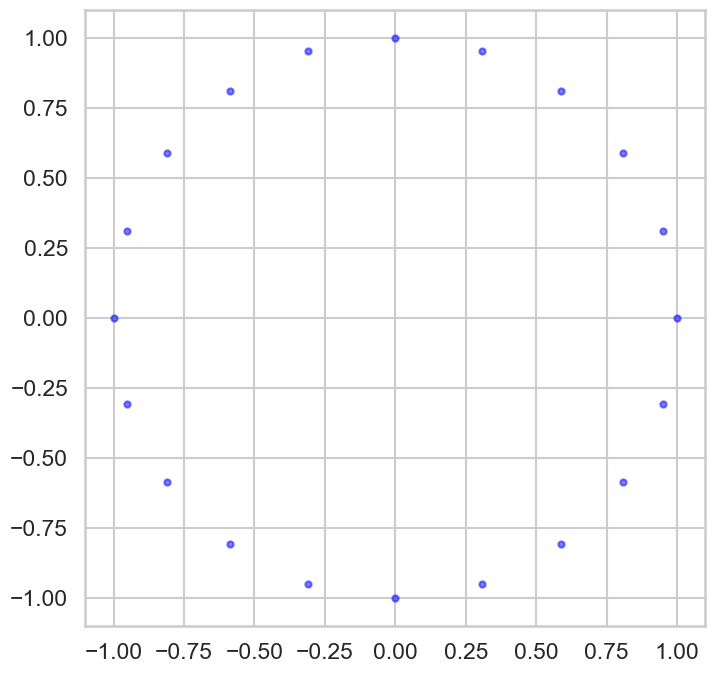

In [287]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)


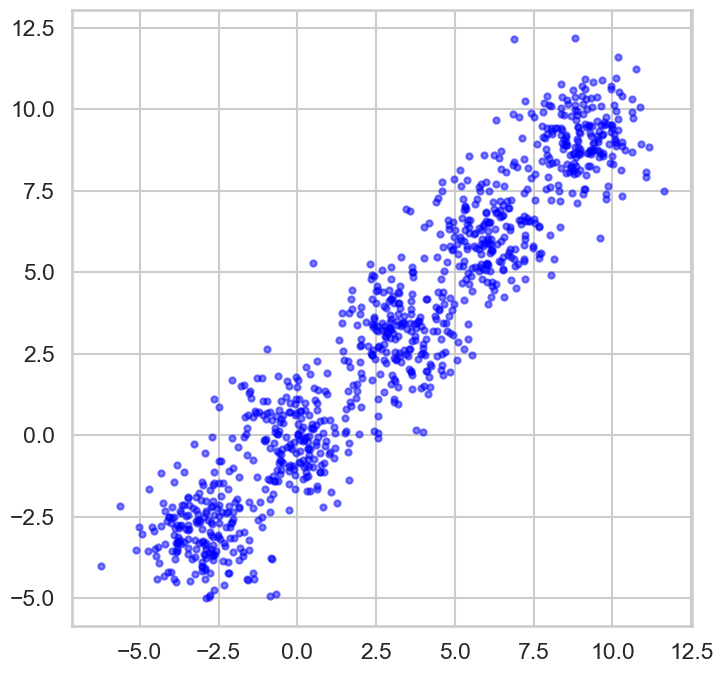

In [288]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

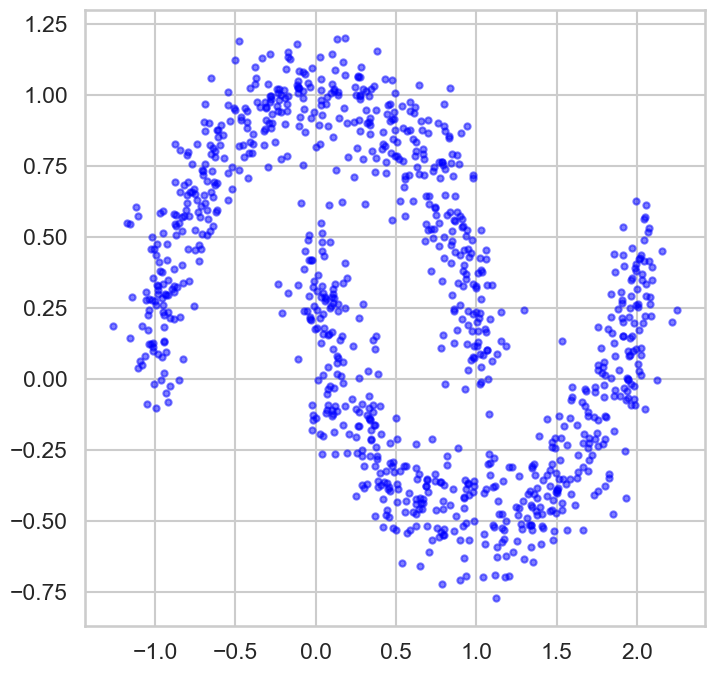

In [289]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)